<font color = green >

## Home Task
</font>

<font color = green>

### Brest Cancer Dataset

</font>



In [1]:
# https://scikit-learn.org/stable/datasets/index.html#breast-cancer-dataset
from sklearn.datasets import load_breast_cancer
X, y = load_breast_cancer(return_X_y= True)
print ('X.shape= ', X.shape)
print ('y.shape= ', y.shape)

X.shape=  (569, 30)
y.shape=  (569,)


In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  =  train_test_split(X, y, random_state= 0)

In [3]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [4]:
from sklearn.neural_network import MLPClassifier
from itertools import product

In [5]:
alphas = (0.001, 0.1, 5)
activations = ('logistic', 'tanh', 'relu')
hidden_layer_variants = [(100, 100), (100, 10)]

for alpha, activation, hidden_layers in product(alphas, activations, hidden_layer_variants):
    clf = MLPClassifier(
        hidden_layer_sizes=hidden_layers,
        solver='lbfgs',
        random_state=0,
        alpha=alpha,
        activation=activation,
        max_iter=10000
    ).fit(X_train_scaled, y_train)

    print(f"Activation: {activation}, Alpha: {alpha}, Hidden Layers: {hidden_layers}")
    print("Train accuracy = {:.3%}".format(clf.score(X_train_scaled, y_train)))
    print("Test accuracy  = {:.3%}\n".format(clf.score(X_test_scaled, y_test)))

Activation: logistic, Alpha: 0.001, Hidden Layers: (100, 100)
Train accuracy = 100.000%
Test accuracy  = 95.105%

Activation: logistic, Alpha: 0.001, Hidden Layers: (100, 10)
Train accuracy = 100.000%
Test accuracy  = 95.105%

Activation: tanh, Alpha: 0.001, Hidden Layers: (100, 100)
Train accuracy = 100.000%
Test accuracy  = 95.804%

Activation: tanh, Alpha: 0.001, Hidden Layers: (100, 10)
Train accuracy = 100.000%
Test accuracy  = 95.804%

Activation: relu, Alpha: 0.001, Hidden Layers: (100, 100)
Train accuracy = 100.000%
Test accuracy  = 93.706%

Activation: relu, Alpha: 0.001, Hidden Layers: (100, 10)
Train accuracy = 100.000%
Test accuracy  = 97.203%

Activation: logistic, Alpha: 0.1, Hidden Layers: (100, 100)
Train accuracy = 100.000%
Test accuracy  = 97.203%

Activation: logistic, Alpha: 0.1, Hidden Layers: (100, 10)
Train accuracy = 100.000%
Test accuracy  = 96.503%

Activation: tanh, Alpha: 0.1, Hidden Layers: (100, 100)
Train accuracy = 100.000%
Test accuracy  = 95.804%

Acti

In [6]:
# YOUR_CODE.  Preproces data, train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
clf = MLPClassifier(
    solver = 'lbfgs',
    hidden_layer_sizes = (100,10),
    random_state = 0,
    activation = 'tanh',
    alpha = 0.1
).fit(X_train_scaled,y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))
# END_CODE 
    

train accuracy= 100.000%
test accuracy= 97.902%


<font color = green>

##  Signs dataset

</font>



In [7]:
# signs data set (fingers)
def load_dataset():
    fn =  os.path.join(path , 'train_signs.h5')
    train_dataset = h5py.File(fn, "r")
    X_train = np.array(train_dataset["train_set_x"][:]) # your train set features
    y_train = np.array(train_dataset["train_set_y"][:]) # your train set labels

    fn =  os.path.join(path , 'test_signs.h5')
    test_dataset =  h5py.File(fn, "r")
    X_test = np.array(test_dataset["test_set_x"][:]) # your test set features
    y_test = np.array(test_dataset["test_set_y"][:]) # your test set labels

    classes = np.array(test_dataset["list_classes"][:]) # the list of classes
    
    y_train = y_train.reshape((1, y_train.shape[0]))
    y_test = y_test.reshape((1, y_test.shape[0]))
    
    return X_train, y_train, X_test, y_test, classes


In [8]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
cwd= os.getcwd()
path = os.path.join(cwd,'data') 

In [9]:
X_train, y_train, X_test, y_test, classes = load_dataset()
y_train = y_train.ravel()
y_test = y_test.ravel()
print ('X_train.shape=', X_train.shape)
print ('X_test.shape=', X_test.shape)
print ('y_train.shape=', y_train.shape)
print ('y_test.shape=', y_test.shape)

X_train.shape= (1080, 64, 64, 3)
X_test.shape= (120, 64, 64, 3)
y_train.shape= (1080,)
y_test.shape= (120,)


In [10]:
def display_samples_in_grid(X, n_rows, n_cols= None, y = None ):
    if n_cols is None: 
        n_cols= n_rows
    indices = np.random.randint(0, len(X),n_rows*n_cols)
    for i in range (n_rows): 
        for j in range (n_cols):
            index = n_rows*i+j           
            ax = plt.subplot(n_rows,n_cols,index+1) 
            plt.imshow(X[indices[index]])
            if not (y is None):
                plt.title(y[indices[index]])
            plt.axis('off')

    plt.tight_layout(h_pad=1)


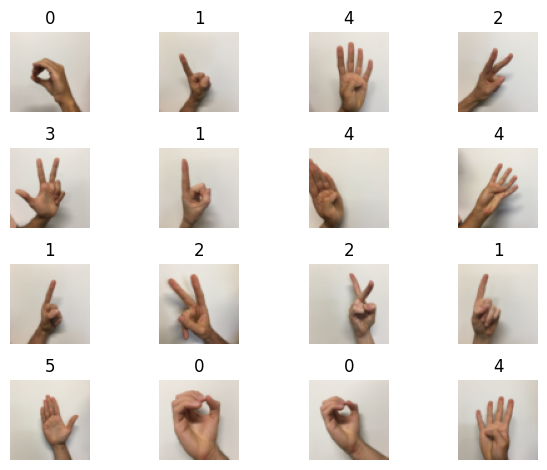

In [11]:
plt.figure()

display_samples_in_grid(X_train, n_rows=4, y= y_train)

In [12]:
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)

In [13]:
print(X_train.max(), X_train.min())

244 4


In [14]:
X_train_scaled = X_train_flatten/255
X_test_scaled = X_test_flatten/255

In [15]:
# YOUR_CODE.  Preproces data
# START_CODE 
m_train, num_px,_,_ = X_train.shape
m_test =  X_test.shape[0]
X_train_flatten = X_train.reshape(m_train, -1)
X_test_flatten =  X_test.reshape(m_test, -1)

X_train_scaled = X_train_flatten/255
X_test_scaled = X_test_flatten/255
# END_CODE     

print ("number of training examples = " + str(X_train_scaled.shape[1]))
print ("number of test examples = " + str(X_test_scaled.shape[1]))
print ("X_train_scaled shape: " + str(X_train_scaled.shape))

print ("X_test_scaled shape: " + str(X_test_scaled.shape))

number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)


### Expected result 

```
number of training examples = 12288
number of test examples = 12288
X_train_scaled shape: (1080, 12288)
X_test_scaled shape: (120, 12288)
```

In [16]:
# YOUR_CODE.  Train classifier and evaluate the perfromance on train and test sets 
# START_CODE 
clf = MLPClassifier(
    solver = 'lbfgs',
    hidden_layer_sizes = (100,100),
    random_state = 0,
    alpha=10
).fit(X_train_scaled,y_train)

print("train accuracy= {:.3%}".format(clf.score (X_train_scaled,y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled,y_test)))
# END_CODE     

train accuracy= 94.815%
test accuracy= 81.667%


c:\Disk\amazinum\camp_2025\.venv\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


### Expected result 

```
train accuracy= 100.000%
test accuracy= 90.000%
```

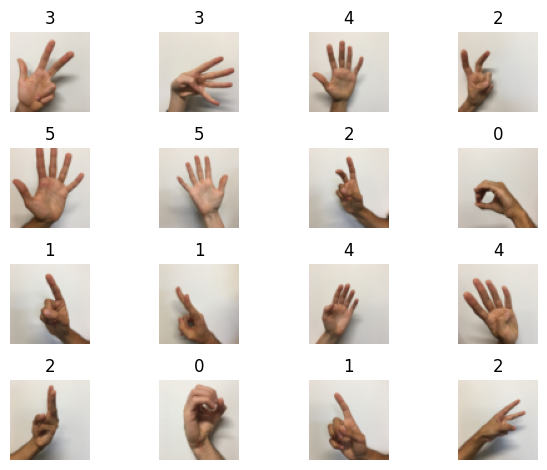

In [17]:
plt.figure()

predicted = clf.predict(X_test_scaled)

display_samples_in_grid(X_test, n_rows=4, y= predicted)


### Compare with SVM 

In [18]:
from sklearn.svm import SVC

In [19]:
clf = SVC(C=10, kernel='rbf', gamma=0.001).fit(X_train_scaled, y_train)
print("train accuracy= {:.3%}".format(clf.score (X_train_scaled, y_train)))
print("test accuracy= {:.3%}".format(clf.score (X_test_scaled, y_test)))

train accuracy= 99.907%
test accuracy= 95.833%
